# CS-GY 6313 / CUSP-GX 6006: Data Visualization - Spring '24
# Homework #1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors
import pandas as pd
from scipy.io import wavfile

## Part A: Matrix Transformations (5 points):

In [2]:
####### PERFORM THE MATRIX TRANSFORMATION HERE ######

# You can modify this point (3,4) to better fit your algorithm.
original_point = [3, 4]

# Converting point to homogeneous coordintates
point = original_point
point.append(1)
point = np.array(point)

# ROTATION MATIRX
theta = np.radians(-30)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0,              0,             1]
])

# TRANSFORMATION MATRIX
x = 3 # Three units right
y = -2 # Two units down
translation_matrix = np.array([
    [1,0,x],
    [0,1,y],
    [0,0,1]
])


transformation_matrix = (translation_matrix @ rotation_matrix)
# @ is matrix multiplication operator
transformed_point = transformation_matrix @ point
print(f"Transformed Point: {transformed_point}")

Transformed Point: [ 7.59807621 -0.03589838  1.        ]


### Plotting 

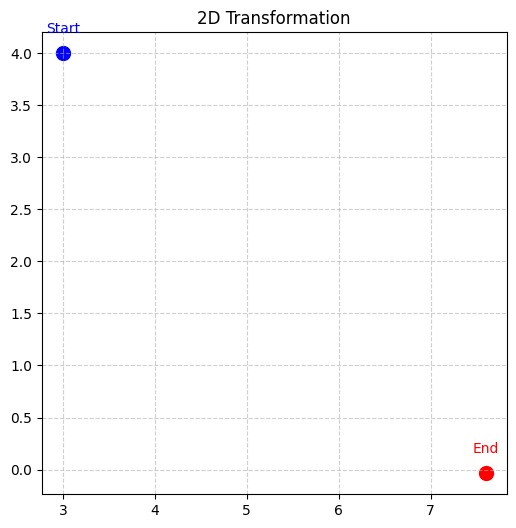

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.grid(True, linestyle='--', alpha=0.6)
plt.scatter(point[0], point[1], color='blue', s=100, label='Original (3, 4)')
plt.text(point[0], point[1]+0.2, 'Start', ha='center', color='blue')
plt.scatter(transformed_point[0], transformed_point[1], color='red', s=100, label='Original (3, 4)')
plt.text(transformed_point[0], transformed_point[1]+0.2, 'End', ha='center', color='red')
plt.title("2D Transformation")
plt.show()

## Part B: Color Map (10 points)

In [4]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

# We read the data as a CSV file
url = "./datasets/height.csv"
data = pd.read_csv(url, delim_whitespace=True, header=None).values    

# Getting the raw column data as `Long`, `Lat`, and `Elev`
Long = data[:,0]; Lat = data[:,1]; Elev = data[:,2];

tl = 5;
tw = 2;
lw = 3;
S = 30
pts=100000;

# `np.linspace` attempts to create a certain # of points when provided a minimum, a maximum, and an expected # of points
# We generate a meshgrid that creates `np.sqrt(pts)` values between the minimum and maximum possible values 
# along the x-axis (Long) and y-axis (Lat).
[x,y] =np.meshgrid(
  np.linspace( min(Long), max(Long), int(np.sqrt(pts)) ),
  np.linspace( min(Lat), max(Lat), int(np.sqrt(pts)) )
)

# This code interpolates the original datasets (Long, Lat) and their corresponding elevations (Elev) along the 
# coordinates provided by (x,y)
z = griddata((Long, Lat), Elev, (x, y), method='linear')

# We flatten all the data from a 2D to 1D representation
x = np.matrix.flatten(x)
y = np.matrix.flatten(y)
z = np.matrix.flatten(z)

/var/folders/hy/shws03954j717ff86n515rcc0000gn/T/ipykernel_64462/3858153819.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None).values


In [5]:
def color_map(z):
    # We normalize values to 0-1 for the matplotlib function
    z_min = np.nanmin(z)
    z_max = np.nanmax(z)
    z_norm = (z - z_min) / (z_max - z_min)

    # We make a 3 dimensional greyscale colorway for plotting z values
    colors = np.zeros((len(z), 3))
    colors[:, 0] = z_norm  
    colors[:, 1] = z_norm  
    colors[:, 2] = z_norm  
    return colors

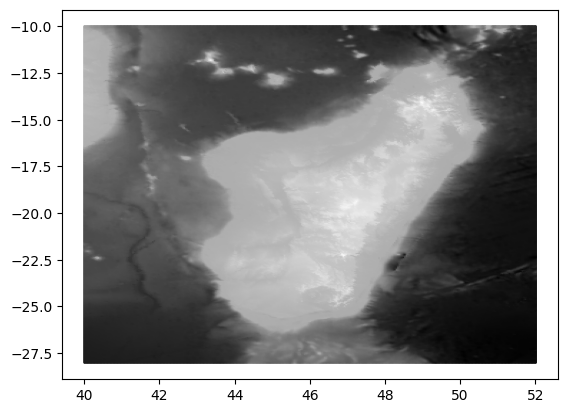

In [6]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #
plt.scatter(x,y,s=1,c=color_map(z))
plt.savefig("results/color_mapping.png", bbox_inches ="tight", pad_inches = 0)
plt.show()

## BONUS QUESTIONS

### Bonus Question A: Tone Mapping

The OpenCV Library (cv2) can be used to open image files like png, jpeg, etc. However, the normal opencv build blocks read exr files for security reasons, we cna flip the environment flag ```OPENCV_IO_ENABLE_OPENEXR``` to enable this functionality

In [7]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"

import cv2
image = cv2.imread("datasets/memorial.exr", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH | cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00016784668..275.0].


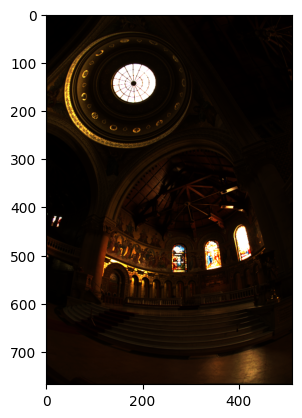

In [8]:
plt.imshow(image)

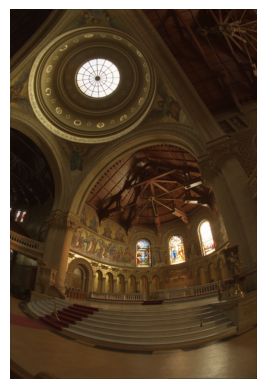

<Figure size 1200x600 with 0 Axes>

In [9]:
#Using Reinhart Tonemapping
tonemapped = image / (1.0 + image)

#Performing Gamma Correction for display monitors
gamma = 2.2
tonemapped_gamma = np.power(tonemapped, 1.0 / gamma)

#Clipping to 0-255 (256bit: 8 byte)
final_image = np.clip(tonemapped_gamma * 255, 0, 255).astype('uint8')
output_bgr = cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR)
cv2.imwrite("results/memorial_mapped.png", output_bgr)

# Preview
plt.imshow(tonemapped_gamma)
plt.axis('off')
plt.figure(figsize=(12,6))
plt.show()

### Bonus Question B: Fourier Analysis

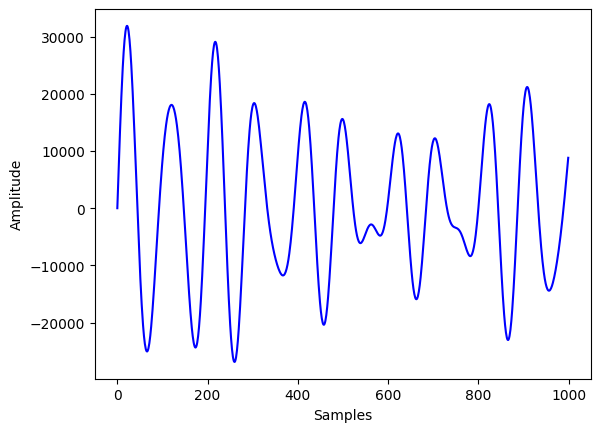

In [10]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

# The input signal has been generated with a 5-second duration, sampled at 44100 Hz
sample_rate, data = wavfile.read('./datasets/signal.wav')
duration = len(data)/sample_rate

# Plot the signal, only sampling the first 1000 data points for easy viewability
plt.plot(data[:1000], 'b')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

Scipy has a Fast Fourier Transform (fft) method, we will be using that for signal analysis

In [11]:
####### MODIFY THIS PART OF THE CODE ######
from scipy.fft import fft, fftfreq

def fourier_transform(data, sample_rate, duration):
    N = len(data)
    yf_full = fft(data)
    xf_full = fftfreq(N, 1 / sample_rate)
    mask = (xf_full >= 400) & (xf_full <= 700)
    xf = xf_full[mask]
    yf = yf_full[mask]
    return xf, yf

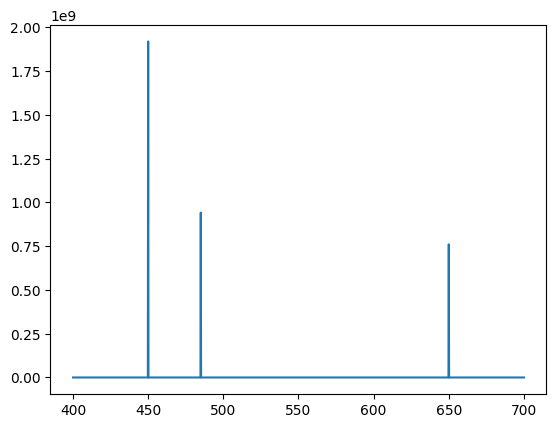

In [12]:
# ----------------------- #
# DO NOT MODIFY THIS CODE #
# ----------------------- #

xf, yf = fourier_transform(data, sample_rate, duration)
plt.plot(xf, np.abs(yf))
plt.savefig("results/fft_result.png", bbox_inches ="tight", pad_inches = 0)
plt.show()